In [1]:
# 아래는 한 회사의 고객 리스트이다. 이 데이터를 활용하여 아래의 문제들에 대한 답을 찾는 Python 스크립트를 작성하라.
import pandas as pd
import numpy as np
 
# data to use
cust = pd.DataFrame({'age' : np.arange(30,51), 
                    'sales' : np.repeat([65,60,80],7)})
 
freq = np.repeat([3,7,4,2,1,1,2],3)
# sales는 각 고객별 총판매금액이며 freq는 구매횟수이다.

In [2]:
# 문제1: 고객의 수를 계산하라
cnt1 = len(cust)
print(cnt1)
cnt2 = cust.index.stop
print(cnt2)

21
21


In [3]:
# 문제2: 고객의 나이를 큰값에서 작은 값의 순서로 정렬하라
cust.sort_values(by="age", ascending=False)

,age,sales
20,50,80
19,49,80
18,48,80
17,47,80
16,46,80
15,45,80
14,44,80
13,43,60
12,42,60
11,41,60


In [4]:
# 문제3: 고객의 나이 중 두번째로 큰 값은 얼마인가?
cage = cust.drop_duplicates("age").sort_values(by="age", ascending=False) #나이 중복제거하고 역순으로 정렬
for idx, val in enumerate(cage.age): 
    if idx == 1: #두번째로 많은 나이
        print(val)
        break

49


In [5]:
# 문제4: sales의 평균값은 얼마인가?
cust.sales.mean()

68.33333333333333

In [6]:
# 문제5: 각 고객별로 sales와 전체고객의 sales 평균간의 차이는 얼마인가?
csales = pd.DataFrame({'sales': cust.sales,
                       'mean' : cust.sales.mean()})
csales['calc'] = np.array(csales["sales"]) - np.array(csales["mean"])
csales

,sales,mean,calc
0,65,68.333333,-3.333333
1,65,68.333333,-3.333333
2,65,68.333333,-3.333333
3,65,68.333333,-3.333333
4,65,68.333333,-3.333333
5,65,68.333333,-3.333333
6,65,68.333333,-3.333333
7,60,68.333333,-8.333333
8,60,68.333333,-8.333333
9,60,68.333333,-8.333333


In [14]:
# 문제6: cust dataframe에 freq를 걸럼으로 추가한 후 처음부터 3명의 고객을 출력하라.
cust["freq"] = freq
#cust[:3]
cust.head(3)

,age,sales,freq,avgsales
0,30,65,3,21.666667
1,31,65,3,21.666667
2,32,65,3,21.666667


In [8]:
# 문제7: 고객별 구매1건당 평균 sales 금액을 구하여 avgsales 라는 이름의 컬럼으로 cust dataframe에 추가한 후 마지막 두 명의  고객을 출력하라.
cust["avgsales"] = cust.sales / cust.freq
cust.tail(2)

,age,sales,freq,avgsales
19,49,80,2,40.0
20,50,80,2,40.0


In [9]:
# 문제8: cust dataframe을 avgsales 순서로 정렬하고, avgsales가 가장 큰 세명의 고객을 출력하라.
cust.sort_values(by="avgsales", ascending=False).head(3)

,age,sales,freq,avgsales
17,47,80,1,80.0
16,46,80,1,80.0
15,45,80,1,80.0


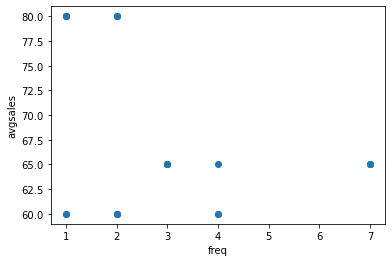

In [10]:
# 문제9: 고객의 freq와 sales간의 분포를 scatter plot으로 작성하라.
import matplotlib.pyplot as plt
plt.scatter(cust.freq, cust.sales)
plt.xlabel("freq")
plt.ylabel("avgsales")
plt.show()

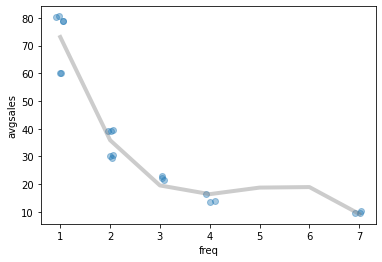

In [11]:
# 문제10 : freq와 평균sales간의 관계를 scatterplot을 이용하여 시각화하고 점들간의 분포를 보여주는 폴리노미얼 추세선을 추가하라. 
# 동일 좌표에 복수의 점이 존재할 수 있으므로 jitter 함수를 이용하여 복수의 점이 존재하는지를 scatterplot에 반영하라. 
# 결과는 다음의 챠트와 같은 모습이 되어야 한다
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def rjitt(arr): #jitter 함수
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# 회귀함수의 차수 지정: 차수가 1이면 단순 선형회귀분석
nDegree = 3

tmpcust = cust.copy()

model = make_pipeline(PolynomialFeatures(nDegree), LinearRegression())
model.fit(np.array(tmpcust.freq).reshape(-1, 1), tmpcust.avgsales)
x_reg = np.arange(8)[1:]
y_reg = model.predict(x_reg.reshape(-1, 1))

tmpcust.freq = rjitt(tmpcust.freq)
tmpcust.avgsales = rjitt(tmpcust.avgsales)

plt.scatter(tmpcust.freq, tmpcust.avgsales, alpha=.40)
plt.plot(x_reg, y_reg, color='gray', linewidth=4, alpha=.40)
plt.xlabel("freq")
plt.ylabel("avgsales")
plt.show()

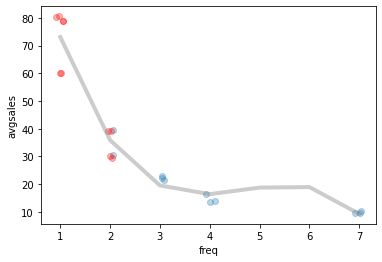

In [12]:
# 문제11: 문제 10의 결과에서 40대인 고객들만 red color로 점을 표시하라
age40 = tmpcust[(tmpcust["age"] >= 40) & (tmpcust["age"] < 50)]
ageother = tmpcust[~((tmpcust["age"] >= 40) & (tmpcust["age"] < 50))]

plt.scatter(ageother.freq, ageother.avgsales, alpha=.30)
plt.scatter(age40.freq, age40.avgsales, color='red', alpha=.30)
plt.plot(x_reg, y_reg, color='gray', linewidth=4, alpha=.40)
plt.xlabel("freq")
plt.ylabel("avgsales")
plt.show()

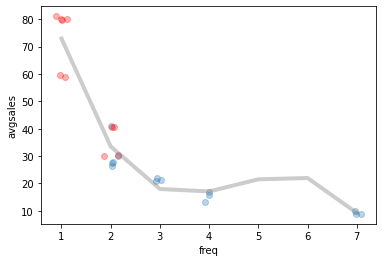

In [13]:
# 문제12: 고객리스트에 동일하게 36세이며 두 번에 걸쳐 총 55를 구매한 고객을 세 명 추가한 후 문제 11과 같은 형식의 scatter plot을 작성하라
tmpcust = cust.copy()
newcust = pd.DataFrame(list(np.repeat({'age':36, 'sales':55, 'freq':2}, 3)))
newcust['avgsales'] = newcust.sales / newcust.freq
tmpcust = tmpcust.append(newcust, ignore_index=True)

model = make_pipeline(PolynomialFeatures(nDegree), LinearRegression())
model.fit(np.array(tmpcust.freq).reshape(-1, 1), tmpcust.avgsales)
x_reg = np.arange(8)[1:]
y_reg = model.predict(x_reg.reshape(-1, 1))

tmpcust.freq = rjitt(tmpcust.freq)
tmpcust.avgsales = rjitt(tmpcust.avgsales)

age40 = tmpcust[(tmpcust["age"] >= 40) & (tmpcust["age"] < 50)]
ageother = tmpcust[~((tmpcust["age"] >= 40) & (tmpcust["age"] < 50))]

plt.scatter(ageother.freq, ageother.avgsales, alpha=.30)
plt.scatter(age40.freq, age40.avgsales, color='red', alpha=.30)
plt.plot(x_reg, y_reg, color='gray', linewidth=4, alpha=.40)
plt.xlabel("freq")
plt.ylabel("avgsales")
plt.show() 